In [1]:
category_map = {
    # 의류
    "107001001": ("의류", "상의"),
    "107001002": ("의류", "아우터"),
    "107001003": ("의류", "바지"),
    "107001004": ("의류", "원피스"),
    "107001005": ("의류", "스커트"),
    "107001006": ("의류", "속옷/홈웨어"),

    # 신발
    "107002001": ("신발", "구두"),
    "107002002": ("신발", "부츠/워커"),
    "107002003": ("신발", "샌들/슬리퍼"),
    "107002004": ("신발", "스포츠화"),
    "107002005": ("신발", "스니커즈"),
    "107002006": ("신발", "신발용품"),

    # 패션소품
    "107003001": ("패션소품", "가방"),
    "107003002": ("패션소품", "모자"),
    "107003003": ("패션소품", "양말/레그웨어"),
    "107003004": ("패션소품", "선글라스/안경테"),
    "107003005": ("패션소품", "액세서리"),
    "107003006": ("패션소품", "시계"),
    "107003007": ("패션소품", "주얼리"),

    # 뷰티
    "107010001": ("뷰티", "스킨케어"),
    "107010002": ("뷰티", "선케어"),
    "107010003": ("뷰티", "클렌징"),
    "107010004": ("뷰티", "메이크업"),
    "107010005": ("뷰티", "프레그런스"),
    "107010006": ("뷰티", "헤어케어"),
    "107010007": ("뷰티", "바디케어"),
    "107010008": ("뷰티", "헤어기기"),
    "107010009": ("뷰티", "미용소품"),
    "107010010": ("뷰티", "건강/위생용품"),

    # 디지털/가전
    "107004001": ("디지털/가전", "음향가전"),
    "107004002": ("디지털/가전", "휴대폰"),
    "107004003": ("디지털/가전", "태블릿"),
    "107004004": ("디지털/가전", "컴퓨터"),
    "107004005": ("디지털/가전", "계절가전"),

    # 가구/인테리어
    "107005001": ("가구/인테리어", "가구"),
    "107005002": ("가구/인테리어", "조명"),
    "107005003": ("가구/인테리어", "침구"),
    "107005004": ("가구/인테리어", "홈패브릭"),
    "107005005": ("가구/인테리어", "홈인테리어"),

    # 생활/주방
    "107006001": ("생활/주방", "주방용품"),
    "107006002": ("생활/주방", "생활용품"),
    "107006003": ("생활/주방", "욕실용품"),
    "107006004": ("생활/주방", "기타 라이프"),

    # 컬처/취미/소품
    "107007001": ("컬처/취미/소품", "취미"),
    "107007002": ("컬처/취미/소품", "스테이셔너리"),
    "107007003": ("컬처/취미/소품", "아트"),
    "107007004": ("컬처/취미/소품", "기타 컬처"),

    # 반려동물
    "107008001": ("반려동물", "반려동물 의류"),
    "107008002": ("반려동물", "반려동물 잡화"),
    "107008003": ("반려동물", "반려동물 용품"),

    # 키즈
    "107009001": ("키즈", "상의"),
    "107009002": ("키즈", "아우터"),
    "107009003": ("키즈", "바지"),
    "107009004": ("키즈", "원피스"),
    "107009005": ("키즈", "스커트"),
    "107009006": ("키즈", "세트 의류"),
    "107009007": ("키즈", "12개월 이하"),
    "107009008": ("키즈", "시즌/테마"),
    "107009009": ("키즈", "속옷/홈웨어"),
    "107009010": ("키즈", "신발"),
    "107009011": ("키즈", "가방/지갑"),
    "107009012": ("키즈", "모자"),
    "107009013": ("키즈", "양말"),
    "107009014": ("키즈", "액세서리/소품"),
    "107009015": ("키즈", "소품"),
    "107009016": ("키즈", "기타 생활용품"),

    # 스포츠/레저
    "107011001": ("스포츠/레저", "상의"),
    "107011002": ("스포츠/레저", "하의"),
    "107011003": ("스포츠/레저", "아우터"),
    "107011004": ("스포츠/레저", "스커트"),
    "107011005": ("스포츠/레저", "원피스"),
    "107011006": ("스포츠/레저", "상하의세트"),
    "107011007": ("스포츠/레저", "수영복/비치웨어"),
    "107011008": ("스포츠/레저", "스포츠신발"),
    "107011009": ("스포츠/레저", "스포츠가방"),
    "107011010": ("스포츠/레저", "스포츠잡화"),
    "107011011": ("스포츠/레저", "스포츠모자"),
    "107011012": ("스포츠/레저", "기구/용품/장비"),
}

In [2]:
import requests
import pandas as pd
import time

headers = {
    "User-Agent": "Mozilla/5.0"
}

def get_products(category_code, page):
    url = "https://api.musinsa.com/api2/dp/v1/plp/goods"
    params = {
        "gf": "A",
        "category": category_code,
        "size": 60,
        "caller": "CATEGORY",
        "page": page
    }
    res = requests.get(url, headers=headers, params=params)
    return res.json()["data"]["list"]

# 전체 결과 저장
all_data = []

for code, (대, 소) in category_map.items():
    page = 1
    while True:
        print(f"[{대} > {소}] page {page} 크롤링 중...")
        try:
            items = get_products(code, page)
            if not items:
                break
        except Exception as e:
            print(f"❌ 오류 발생: {code}, page {page}, error: {e}")
            break

        for item in items:
            all_data.append({
                "대분류": 대,
                "소분류": 소,
                "상품명": item.get("goodsName"),
                "브랜드": item.get("brandName"),
                "정상가": item.get("normalPrice"),
                "할인가": item.get("price"),
                "할인율": item.get("saleRate"),
                "리뷰 수": item.get("reviewCount"),
                "리뷰 점수": item.get("reviewScore"),
            })

        page += 1
        time.sleep(0.2)

df = pd.DataFrame(all_data)
print(df.head())


[의류 > 상의] page 1 크롤링 중...
[의류 > 상의] page 2 크롤링 중...
[의류 > 상의] page 3 크롤링 중...
[의류 > 상의] page 4 크롤링 중...
[의류 > 상의] page 5 크롤링 중...
[의류 > 상의] page 6 크롤링 중...
[의류 > 상의] page 7 크롤링 중...
[의류 > 상의] page 8 크롤링 중...
[의류 > 상의] page 9 크롤링 중...
[의류 > 상의] page 10 크롤링 중...
[의류 > 상의] page 11 크롤링 중...
[의류 > 상의] page 12 크롤링 중...
[의류 > 상의] page 13 크롤링 중...
[의류 > 상의] page 14 크롤링 중...
[의류 > 상의] page 15 크롤링 중...
[의류 > 상의] page 16 크롤링 중...
[의류 > 상의] page 17 크롤링 중...
[의류 > 상의] page 18 크롤링 중...
[의류 > 상의] page 19 크롤링 중...
[의류 > 상의] page 20 크롤링 중...
[의류 > 상의] page 21 크롤링 중...
[의류 > 상의] page 22 크롤링 중...
[의류 > 상의] page 23 크롤링 중...
[의류 > 상의] page 24 크롤링 중...
[의류 > 상의] page 25 크롤링 중...
[의류 > 상의] page 26 크롤링 중...
[의류 > 상의] page 27 크롤링 중...
[의류 > 상의] page 28 크롤링 중...
[의류 > 상의] page 29 크롤링 중...
[의류 > 상의] page 30 크롤링 중...
[의류 > 상의] page 31 크롤링 중...
[의류 > 상의] page 32 크롤링 중...
[의류 > 상의] page 33 크롤링 중...
[의류 > 상의] page 34 크롤링 중...
[의류 > 상의] page 35 크롤링 중...
[의류 > 상의] page 36 크롤링 중...
[의류 > 상의] page 37 크롤링 중...
[의류 > 상의] 

In [6]:
import pandas as pd

# 원본 CSV 파일 로드
df = pd.read_csv("musinsa.csv")

# 고유 카테고리 목록 생성 (id가 첫 번째)
categories_df = df[['대분류', '소분류']].drop_duplicates().reset_index(drop=True)
categories_df.insert(0, 'category_id', categories_df.index + 1)
categories_df.columns = ['category_id', 'main_category', 'sub_category']

# 고유 브랜드 목록 생성 (id가 첫 번째)
brands_df = df[['브랜드']].drop_duplicates().reset_index(drop=True)
brands_df.insert(0, 'brand_id', brands_df.index + 1)
brands_df.columns = ['brand_id', 'brand_name']

# 카테고리/브랜드 ID를 원본 데이터에 매핑
df = df.merge(categories_df, left_on=['대분류', '소분류'], right_on=['main_category', 'sub_category'], how='left')
df = df.merge(brands_df, left_on='브랜드', right_on='brand_name', how='left')

# products 테이블 생성 (id가 첫 번째 열)
products_df = df[[
    '상품명', 'category_id', 'brand_id', '정상가', '할인가', '할인율', '리뷰 수', '리뷰 점수'
]].copy()
products_df.columns = [
    'name', 'category_id', 'brand_id',
    'original_price', 'discount_price', 'discount_rate',
    'review_count', 'review_score'
]
products_df.insert(0, 'product_id', products_df.index + 1)

# 파일 저장
categories_df.to_csv("categories.csv", index=False, encoding='utf-8-sig')
brands_df.to_csv("brands.csv", index=False, encoding='utf-8-sig')
products_df.to_csv("products.csv", index=False, encoding='utf-8-sig')


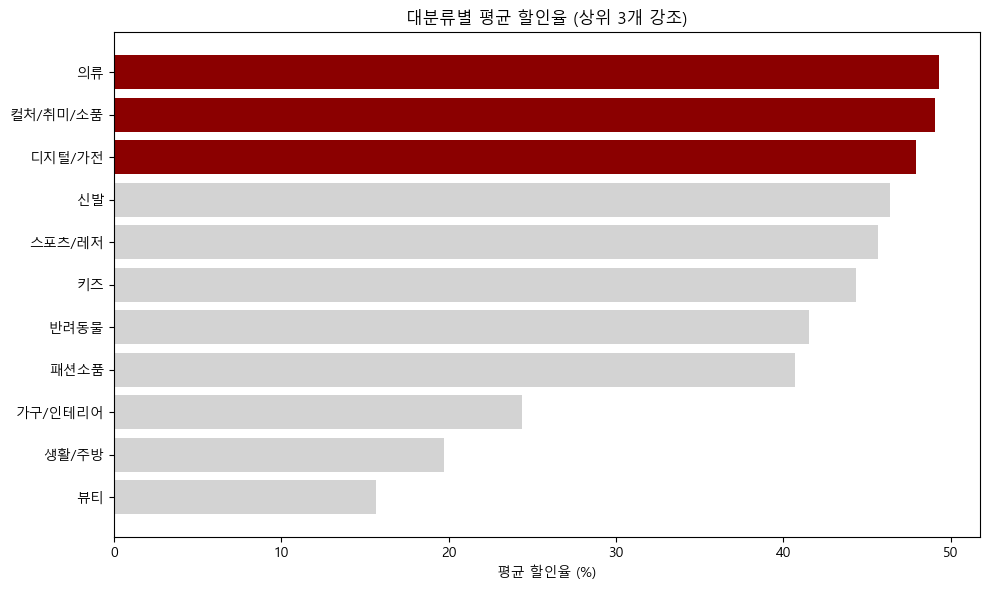

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


mpl.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
mpl.rcParams['axes.unicode_minus'] = False  

category_discount = (
    df.groupby("대분류")["할인율"]
    .mean()
    .reset_index()
    .sort_values("할인율", ascending=False)
)

# 색상 지정: 상위 3개는 darkred, 나머지는 grey
colors = ["darkred" if i < 3 else "lightgrey" for i in range(len(category_discount))]

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(category_discount["대분류"], category_discount["할인율"], color=colors)
plt.xlabel("평균 할인율 (%)")
plt.title("대분류별 평균 할인율")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2036\2593633117.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="점유율 (%)", y="브랜드", ax=axes[i], palette="GnBu")
C:\Users\User\AppData\Local\Temp\ipykernel_2036\2593633117.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="점유율 (%)", y="브랜드", ax=axes[i], palette="GnBu")
C:\Users\User\AppData\Local\Temp\ipykernel_2036\2593633117.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


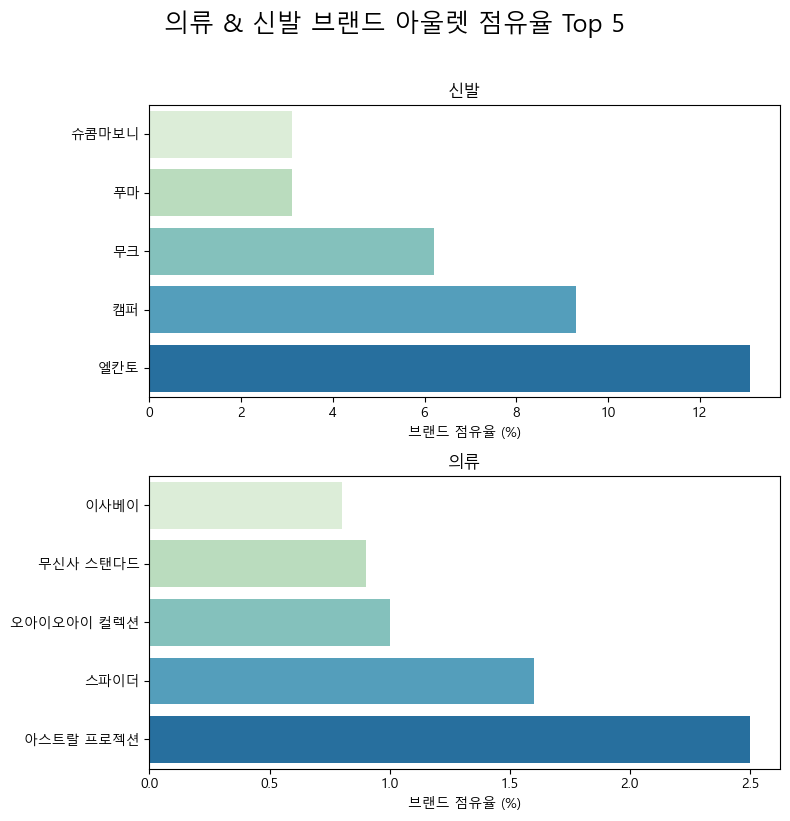

In [67]:
import math

# ✅ 1. 대분류/브랜드별 상품 수 계산
brand_counts = df.groupby(["대분류", "브랜드"]).size().reset_index(name="상품 수")
brand_counts["총 상품 수"] = brand_counts.groupby("대분류")["상품 수"].transform("sum")
brand_counts["점유율 (%)"] = (brand_counts["상품 수"] / brand_counts["총 상품 수"] * 100).round(1)

# ✅ 2. 대분류별 브랜드 Top 5 추출
top5_brands = (
    brand_counts.sort_values(["대분류", "상품 수"], ascending=[True, False])
    .groupby("대분류")
    .head(5)
    .reset_index(drop=True)
)

# ✅ 3. '의류'와 '신발'만 필터링
filtered_top5 = top5_brands[top5_brands["대분류"].isin(["의류", "신발"])]

# ✅ 4. 시각화 (subplot 형태 - 세로 2개 배치)
categories = filtered_top5["대분류"].unique()

fig, axes = plt.subplots(len(categories), 1, figsize=(8, 8), constrained_layout=True)

for i, cat in enumerate(categories):
    data = filtered_top5[filtered_top5["대분류"] == cat].sort_values("점유율 (%)", ascending=True)
    sns.barplot(data=data, x="점유율 (%)", y="브랜드", ax=axes[i], palette="GnBu")
    axes[i].set_title(f"{cat}")
    axes[i].set_xlabel("브랜드 점유율 (%)")
    axes[i].set_ylabel("")

plt.suptitle("의류 & 신발 브랜드 아울렛 점유율 Top 5", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

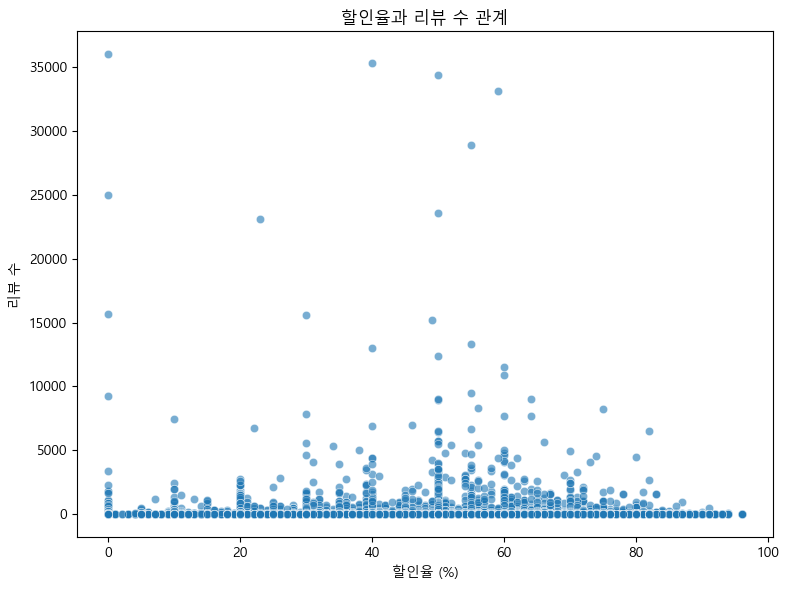

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# 산점도 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="할인율", y="리뷰 수", alpha=0.6)
plt.title("할인율과 리뷰 수 관계")
plt.xlabel("할인율 (%)")
plt.ylabel("리뷰 수")
plt.tight_layout()
plt.show()


In [70]:
# 리뷰 점수 상위 10% 기준값 계산
threshold = df["리뷰 점수"].quantile(0.9)

# 고평점 상품 필터링
high_score_products = df[df["리뷰 점수"] >= threshold]

# 대분류별 요약 통계
summary = (
    high_score_products.groupby("대분류")
    .agg({
        "할인율": "mean",
        "리뷰 수": "mean",
        "정상가": "mean",
        "상품명": "count"
    })
    .rename(columns={
        "할인율": "평균 할인율",
        "리뷰 수": "평균 리뷰 수",
        "정상가": "평균 정상가",
        "상품명": "상품 수"
    })
    .round(1)
    .reset_index()
)

# 결과 확인
print(summary)


         대분류  평균 할인율  평균 리뷰 수    평균 정상가   상품 수
0    가구/인테리어    25.2      6.2   50749.5     39
1     디지털/가전    50.0      3.5   38700.0     10
2       반려동물    38.1      6.4   37200.0     20
3         뷰티    15.0      8.9   31400.0     18
4      생활/주방    18.9      4.9   37281.4     43
5     스포츠/레저    43.9      3.4  133007.9   2388
6         신발    47.1      5.1  172928.2    873
7         의류    47.8      4.9  106560.2  20458
8   컬처/취미/소품    50.3      4.9   23233.3     12
9         키즈    51.0      4.5   69509.1    625
10      패션소품    41.4      3.9   82261.8   3054


C:\Users\User\AppData\Local\Temp\ipykernel_2036\358111512.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("할인율_구간")["리뷰 수"]
C:\Users\User\AppData\Local\Temp\ipykernel_2036\358111512.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=review_by_discount_bin, x="할인율_구간", y="평균 리뷰 수", palette=colors)


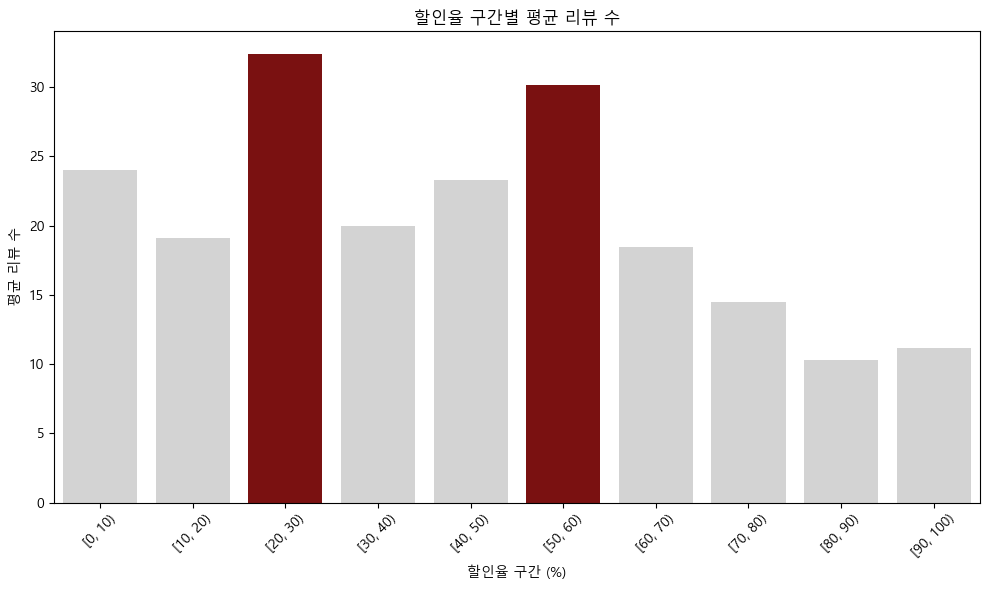

In [74]:
# 할인율을 10% 단위 구간으로 나누기
df["할인율_구간"] = pd.cut(df["할인율"], bins=range(0, 110, 10), right=False)

# 각 구간별 평균 리뷰 수 계산
review_by_discount_bin = (
    df.groupby("할인율_구간")["리뷰 수"]
    .mean()
    .reset_index()
    .rename(columns={"리뷰 수": "평균 리뷰 수"})
)

colors = ["darkred" if interval in ["[20, 30)", "[50, 60)"] else "lightgrey"
          for interval in review_by_discount_bin["할인율_구간"].astype(str)]

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=review_by_discount_bin, x="할인율_구간", y="평균 리뷰 수", palette=colors)
plt.title("할인율 구간별 평균 리뷰 수")
plt.xlabel("할인율 구간 (%)")
plt.ylabel("평균 리뷰 수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()